### One Sample

Loading the dataset...
First few rows of the dataset:
   id    river  length
0   1  Guanapo    19.1
1   2  Guanapo    23.3
2   3  Guanapo    18.2
3   4  Guanapo    16.4
4   5  Guanapo    19.7

Summary statistics:
count    29.00
mean     18.30
std       2.58
min      11.20
25%      17.50
50%      18.80
75%      19.70
max      23.30
Name: length, dtype: float64

Additional statistics:
Variance: 6.68 (measures data spread, higher values mean more variability)
Skewness: -0.77 (measures asymmetry, values near 0 suggest symmetry, >0 indicates right skew, <0 left skew)
Kurtosis: 0.79 (measures tail heaviness, normal distribution = 3 for Fisher, 0 for Pearson)

Plotting histogram...


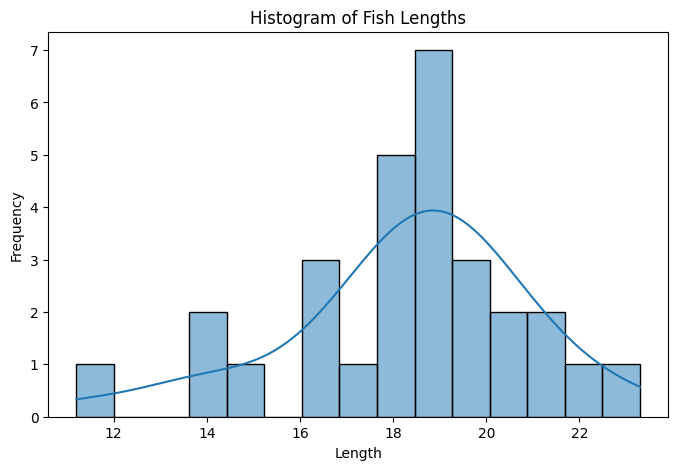


Generating Q-Q plot for normality...


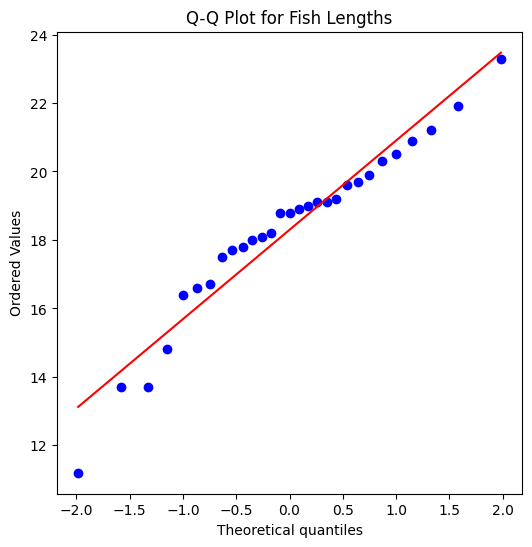


Performing Shapiro-Wilk test for normality...
Shapiro-Wilk test statistic: 0.95, p-value: 0.18 (Data is normal)

Performing one-sample t-test...
T-test results:
           T  dof alternative  p-val           CI95%  cohen-d    BF10  power
T-test -3.55   28   two-sided    0.0  [17.31, 19.28]     0.66  25.071   0.93
Interpretation: The sample mean is significantly different from 20.

Performing Wilcoxon signed-rank test...
Wilcoxon signed-rank test results:
          W-val alternative  p-val   RBC  CLES
Wilcoxon   67.5   two-sided    0.0 -0.69   NaN
Interpretation: The sample median is significantly different from 20.

Plotting Kernel Density Estimate (KDE)...


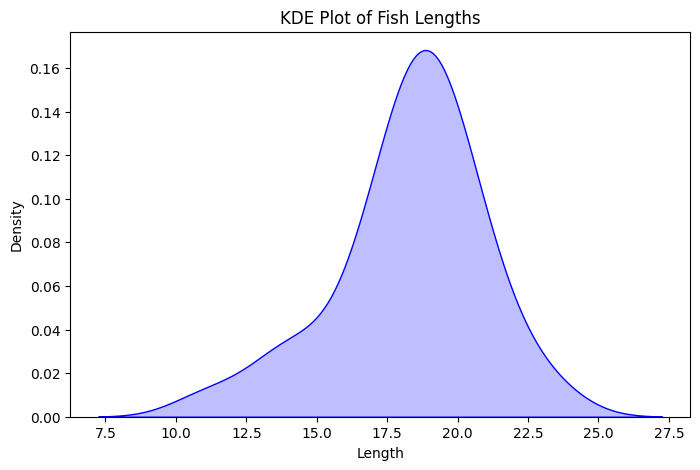


95% Confidence Interval for the Mean: 17.31 to 19.28

Checking for outliers using IQR...
Outliers detected (values beyond 14.20 to 23.00):
    id    river  length
1    2  Guanapo    23.3
23  24  Guanapo    13.7
25  26  Guanapo    13.7
27  28  Guanapo    11.2


In [3]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the data
print("Loading the dataset...")
data = pd.read_csv("data/CS1-onesample.csv")
print("First few rows of the dataset:")
print(data.head())

# Summarize the data
print("\nSummary statistics:")
summary = data["length"].describe().round(2)
print(summary)

# Additional summary statistics with context
variance = data["length"].var()
skewness = stats.skew(data["length"])
kurtosis = stats.kurtosis(data["length"])
print("\nAdditional statistics:")
print(f"Variance: {variance:.2f} (measures data spread, higher values mean more variability)")
print(f"Skewness: {skewness:.2f} (measures asymmetry, values near 0 suggest symmetry, >0 indicates right skew, <0 left skew)")
print(f"Kurtosis: {kurtosis:.2f} (measures tail heaviness, normal distribution = 3 for Fisher, 0 for Pearson)")

# Histogram
print("\nPlotting histogram...")
plt.figure(figsize=(8, 5))
sns.histplot(data["length"], kde=True, bins=15)
plt.title("Histogram of Fish Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
print("\nGenerating Q-Q plot for normality...")
plt.figure(figsize=(6, 6))
stats.probplot(data["length"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Fish Lengths")
plt.show()

# Shapiro-Wilk Test for normality
print("\nPerforming Shapiro-Wilk test for normality...")
shapiro_test = stats.shapiro(data["length"])
normality_result = "normal" if shapiro_test.pvalue > 0.05 else "not normal"
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic:.2f}, p-value: {shapiro_test.pvalue:.2f} (Data is {normality_result})")

# One-sample t-test
print("\nPerforming one-sample t-test...")
t_test = pg.ttest(x=data["length"], y=20, alternative="two-sided").round(2)
t_test_result = "significantly different from 20" if t_test["p-val"].values[0] < 0.05 else "not significantly different from 20"
print(f"T-test results:\n{t_test}")
print(f"Interpretation: The sample mean is {t_test_result}.")

# Wilcoxon signed-rank test (for non-normal data)
print("\nPerforming Wilcoxon signed-rank test...")
wilcoxon_test = pg.wilcoxon(data["length"] - 20, alternative="two-sided").round(2)
wilcoxon_result = "significantly different from 20" if wilcoxon_test["p-val"].values[0] < 0.05 else "not significantly different from 20"
print(f"Wilcoxon signed-rank test results:\n{wilcoxon_test}")
print(f"Interpretation: The sample median is {wilcoxon_result}.")

# KDE Plot
print("\nPlotting Kernel Density Estimate (KDE)...")
plt.figure(figsize=(8, 5))
sns.kdeplot(data["length"], shade=True, color="blue")
plt.title("KDE Plot of Fish Lengths")
plt.xlabel("Length")
plt.ylabel("Density")
plt.show()

# Confidence Interval for the Mean
mean = data["length"].mean()
std_error = stats.sem(data["length"])
conf_interval = stats.t.interval(0.95, len(data["length"])-1, loc=mean, scale=std_error)
print(f"\n95% Confidence Interval for the Mean: {conf_interval[0]:.2f} to {conf_interval[1]:.2f}")

# Detect outliers using the IQR method
print("\nChecking for outliers using IQR...")
q1 = data["length"].quantile(0.25)
q3 = data["length"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data["length"] < lower_bound) | (data["length"] > upper_bound)]
print(f"Outliers detected (values beyond {lower_bound:.2f} to {upper_bound:.2f}):\n{outliers}")


### Two Sample

Loading the dataset...
First few rows of the dataset:
     river  length
0  Guanapo    19.1
1  Guanapo    23.3
2  Guanapo    18.2
3  Guanapo    16.4
4  Guanapo    19.7

Summary statistics for the entire dataset:
          length
count  68.000000
mean   19.463235
std     2.370081
min    11.200000
25%    18.400000
50%    19.300000
75%    20.925000
max    26.400000

Summary statistics grouped by river:
         count       mean       std   min   25%   50%   75%   max
river                                                            
Aripo     39.0  20.330769  1.780620  17.5  19.1  20.1  21.3  26.4
Guanapo   29.0  18.296552  2.584636  11.2  17.5  18.8  19.7  23.3

Visualizing the data with a boxplot...


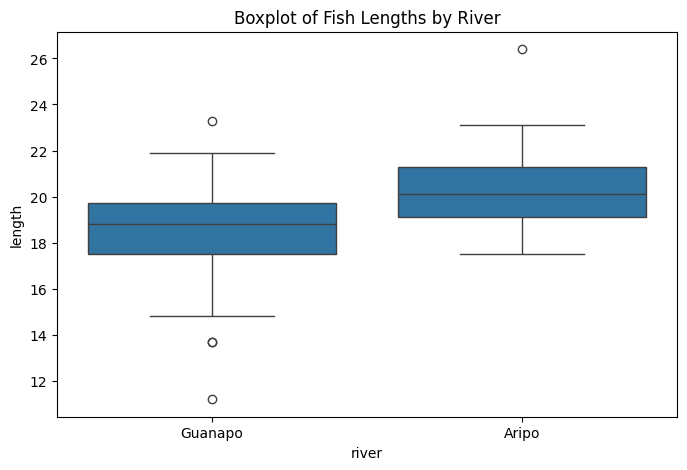


Performing Shapiro-Wilk test for normality...
The Shapiro-Wilk test checks if the data comes from a normal distribution.
Shapiro-Wilk test results:
                W      pval  normal
river                              
Guanapo  0.949384  0.176423    True
Aripo    0.935958  0.028023   False

Testing for equality of variances using Levene's Test...
Levene's test checks if the variances of the two groups are equal.
Levene's test results:
               W      pval  equal_var
levene  1.773184  0.187569       True

Testing for equality of variances using Bartlett's Test...
Bartlett's test checks if the variances of the two groups are equal assuming normality.
Bartlett's test results:
                 T      pval  equal_var
bartlett  4.473437  0.034426      False

Extracting groups for t-test and Mann-Whitney U test...

Performing a two-sample t-test...
The two-sample t-test checks if the means of the two groups are significantly different.
Two-sample t-test results:
                   T-t

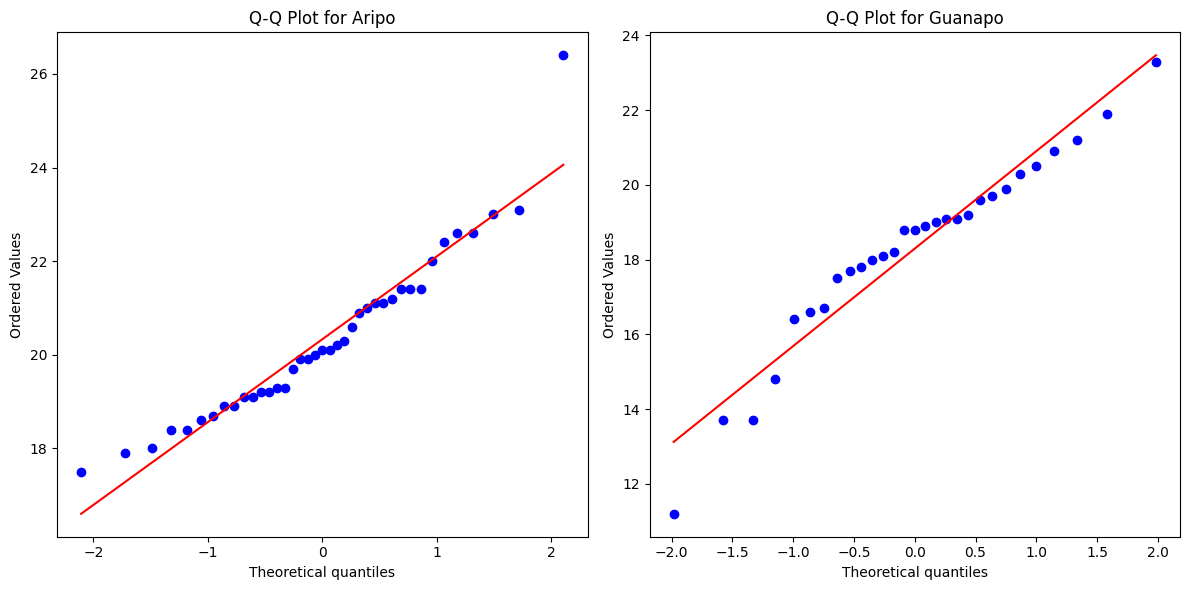


Calculating Cohen's d (effect size)...
Cohen's d quantifies the size of the difference between the means of the two groups.
Cohen's d: 0.9423748389254938

Performing a power analysis to calculate required sample size for future studies...
The power analysis calculates the sample size needed to detect the observed effect size with 80% power.
Required sample size per group for 80% power: 18.69

Checking for outliers using robust tests...
Outlier detection using the Median Absolute Deviation (MAD) method.
Outliers in Aripo: [26.4]
Outliers in Guanapo: [23.3, 14.8, 13.7, 13.7, 11.2]

Calculating 95% confidence intervals for the means of each group...
Confidence intervals provide a range of plausible values for the true mean.
95% CI for Aripo mean: (19.77192983520545, 20.88960862633301)
95% CI for Guanapo mean: (17.355857381108684, 19.23724606716717)


In [4]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Load the data
print("Loading the dataset...")
rivers_py = pd.read_csv("data/CS1-twosample.csv")
print("First few rows of the dataset:")
print(rivers_py.head())

# Summarize the data
print("\nSummary statistics for the entire dataset:")
print(rivers_py.describe())

print("\nSummary statistics grouped by river:")
print(rivers_py.groupby("river")["length"].describe())

# Visualize the data
print("\nVisualizing the data with a boxplot...")
plt.figure(figsize=(8, 5))
sns.boxplot(data=rivers_py, x="river", y="length")
plt.title("Boxplot of Fish Lengths by River")
plt.show()

# Test for normality (Shapiro-Wilk Test)
print("\nPerforming Shapiro-Wilk test for normality...")
print("The Shapiro-Wilk test checks if the data comes from a normal distribution.")
normality_results = pg.normality(dv="length", group="river", data=rivers_py)
print("Shapiro-Wilk test results:")
print(normality_results)

# Test for equality of variances (Levene’s Test)
print("\nTesting for equality of variances using Levene's Test...")
print("Levene's test checks if the variances of the two groups are equal.")
levene_results = pg.homoscedasticity(dv="length", group="river", method="levene", data=rivers_py)
print("Levene's test results:")
print(levene_results)

# Test for equality of variances (Bartlett’s Test)
print("\nTesting for equality of variances using Bartlett's Test...")
print("Bartlett's test checks if the variances of the two groups are equal assuming normality.")
bartlett_results = pg.homoscedasticity(dv="length", group="river", method="bartlett", data=rivers_py)
print("Bartlett's test results:")
print(bartlett_results)

# Extract groups for further analysis
print("\nExtracting groups for t-test and Mann-Whitney U test...")
aripo = rivers_py.query('river == "Aripo"')["length"]
guanapo = rivers_py.query('river == "Guanapo"')["length"]

# Perform a two-sample t-test
print("\nPerforming a two-sample t-test...")
print("The two-sample t-test checks if the means of the two groups are significantly different.")
ttest_results = pg.ttest(aripo, guanapo, correction=False)
print("Two-sample t-test results:")
print(ttest_results.transpose())

# Perform a two-sample z-test
print("\nPerforming a two-sample z-test...")
print("The two-sample z-test is used for large samples to compare means.")
n1, n2 = len(aripo), len(guanapo)
mean1, mean2 = aripo.mean(), guanapo.mean()
std1, std2 = aripo.std(ddof=1), guanapo.std(ddof=1)
z_score = (mean1 - mean2) / np.sqrt(std1**2/n1 + std2**2/n2)
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_score)))
print(f"Z-score: {z_score:.3f}, p-value: {p_value_z:.5f}")

# Perform a Mann-Whitney U Test
print("\nPerforming the Mann-Whitney U test...")
print("The Mann-Whitney U test checks if the medians of the two groups are significantly different.")
mwu_results = pg.mwu(aripo, guanapo)
print("Mann-Whitney U test results:")
print(mwu_results)

# Visualize normality with Q-Q plots
print("\nVisualizing normality using Q-Q plots...")
print("Q-Q plots visually assess whether the data follow a normal distribution.")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(aripo, dist="norm", plot=plt)
plt.title("Q-Q Plot for Aripo")
plt.subplot(1, 2, 2)
stats.probplot(guanapo, dist="norm", plot=plt)
plt.title("Q-Q Plot for Guanapo")
plt.tight_layout()
plt.show()

# Calculate effect size (Cohen’s d)
print("\nCalculating Cohen's d (effect size)...")
print("Cohen's d quantifies the size of the difference between the means of the two groups.")
cohen_d = pg.compute_effsize(aripo, guanapo, paired=False, eftype="cohen")
print(f"Cohen's d: {cohen_d}")

# Perform a power analysis for required sample size
print("\nPerforming a power analysis to calculate required sample size for future studies...")
print("The power analysis calculates the sample size needed to detect the observed effect size with 80% power.")
power_analysis = pg.power_ttest(d=cohen_d, alpha=0.05, power=0.80, contrast="two-samples", alternative="two-sided")
print(f"Required sample size per group for 80% power: {power_analysis:.2f}")

# Check for outliers
print("\nChecking for outliers using robust tests...")
print("Outlier detection using the Median Absolute Deviation (MAD) method.")
mad_aripo = stats.median_abs_deviation(aripo)
mad_guanapo = stats.median_abs_deviation(guanapo)
outliers_aripo = aripo[abs(aripo - aripo.median()) > 3 * mad_aripo]
outliers_guanapo = guanapo[abs(guanapo - guanapo.median()) > 3 * mad_guanapo]
print(f"Outliers in Aripo: {outliers_aripo.tolist()}")
print(f"Outliers in Guanapo: {outliers_guanapo.tolist()}")

# Calculate confidence intervals for the means
print("\nCalculating 95% confidence intervals for the means of each group...")
print("Confidence intervals provide a range of plausible values for the true mean.")
ci_aripo = stats.norm.interval(0.95, loc=aripo.mean(), scale=aripo.std(ddof=1)/np.sqrt(len(aripo)))
ci_guanapo = stats.norm.interval(0.95, loc=guanapo.mean(), scale=guanapo.std(ddof=1)/np.sqrt(len(guanapo)))
print(f"95% CI for Aripo mean: {ci_aripo}")
print(f"95% CI for Guanapo mean: {ci_guanapo}")

### Paired Sample (Panel)

Summary Statistics:
time   evening  morning    diff
count    20.00    20.00   20.00
mean    197.37   313.46 -116.08
std      87.51    73.77  100.16
min      60.10   146.10 -235.30
25%     137.85   266.58 -195.08
50%     188.95   320.50 -135.70
75%     260.75   359.70  -39.65
max     379.30   432.50  115.50

Skewness and Kurtosis:
{'Morning Skew': -0.39, 'Morning Kurtosis': -0.33, 'Evening Skew': 0.21, 'Evening Kurtosis': -0.68, 'Diff Skew': 0.74, 'Diff Kurtosis': -0.37}


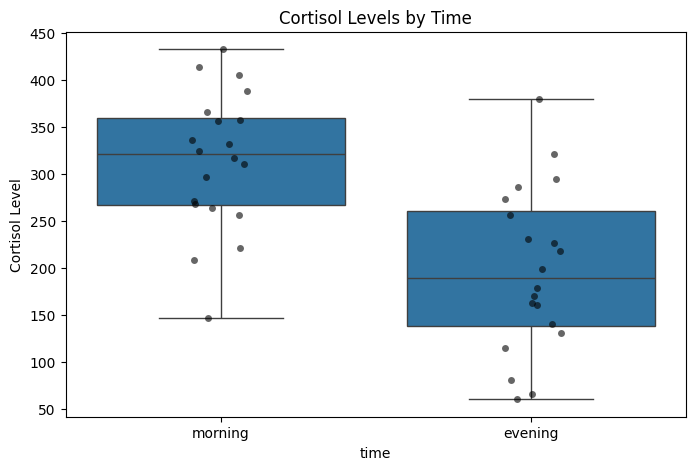

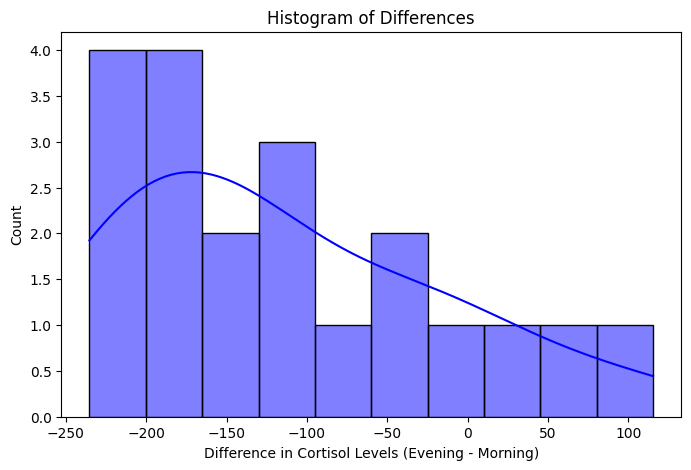


Normality Test for Differences:
{'W': 0.92, 'p-value': 0.12, 'Normality': 'Yes'}

Paired t-test Results:
{'t-statistic': 5.18, 'p-value': 0.0, 'Significant': 'Yes'}

Outliers in Differences:
Empty DataFrame
Columns: [morning, evening, diff]
Index: []


In [5]:
import pandas as pd
from scipy.stats import skew, kurtosis, shapiro, ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'data/CS1-twopaired.csv'
df = pd.read_csv(file_path)

# Transform data to wide format
df_wide = df.pivot(index="patient_id", columns="time", values="cortisol")
df_wide["diff"] = df_wide["evening"] - df_wide["morning"]

# Summary Statistics
summary_stats = df_wide.describe().round(2)
print("Summary Statistics:")
print(summary_stats)

# Skewness and Kurtosis
skewness_kurtosis = {
    "Morning Skew": skew(df_wide["morning"]).round(2),
    "Morning Kurtosis": kurtosis(df_wide["morning"]).round(2),
    "Evening Skew": skew(df_wide["evening"]).round(2),
    "Evening Kurtosis": kurtosis(df_wide["evening"]).round(2),
    "Diff Skew": skew(df_wide["diff"]).round(2),
    "Diff Kurtosis": kurtosis(df_wide["diff"]).round(2),
}
print("\nSkewness and Kurtosis:")
print(skewness_kurtosis)

# Visualizations
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="time", y="cortisol")
sns.stripplot(data=df, x="time", y="cortisol", color='black', alpha=0.6, jitter=True)
plt.title("Cortisol Levels by Time")
plt.ylabel("Cortisol Level")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df_wide["diff"], kde=True, bins=10, color='blue')
plt.title("Histogram of Differences")
plt.xlabel("Difference in Cortisol Levels (Evening - Morning)")
plt.show()

# Normality Check
shapiro_test = shapiro(df_wide["diff"])
normality_result = {
    "W": round(shapiro_test.statistic, 2),
    "p-value": round(shapiro_test.pvalue, 2),
    "Normality": "Yes" if shapiro_test.pvalue > 0.05 else "No",
}
print("\nNormality Test for Differences:")
print(normality_result)

# Paired t-test
t_stat, p_val = ttest_rel(df_wide["morning"], df_wide["evening"])
t_test_result = {
    "t-statistic": round(t_stat, 2),
    "p-value": round(p_val, 2),
    "Significant": "Yes" if p_val < 0.05 else "No",
}
print("\nPaired t-test Results:")
print(t_test_result)

# Outlier Detection
q1, q3 = df_wide["diff"].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
outliers = df_wide[(df_wide["diff"] < lower_bound) | (df_wide["diff"] > upper_bound)]
print("\nOutliers in Differences:")
print(outliers[["morning", "evening", "diff"]])